# Breast Cancer Detection

## Data Challenge

You belong to the data team at a local research hospital. You've been tasked with developing a means to help doctors diagnose breast cancer. You've been given data about east cells; where biopsied brit is benign (not harmful) or malignant (cancerous).

- Sample code number: id number
- Clump Thickness: 1 - 10
- Uniformity of Cell Size: 1 - 10
- Uniformity of Cell Shape: 1 - 10
- Marginal Adhesion: 1 - 10
- Single Epithelial Cell Size: 1 - 10
- Bare Nuclei: 1 - 10
- Bland Chromatin: 1 - 10
- Normal Nucleoli: 1 - 10
- Mitoses: 1 - 10
- Class: (2 for benign, 4 for malignant)




## Summary of results
1.	What features of a cell are the largest drivers of malignancy?
    - The features of a cell that are the largest drivers of malignancy are:
        - Clump Thickness
        - Marginal Adhesion
        - Uniformity of Cell Size
2.	How would a physician use your product?
    - A physician can input the data from the collected features and determine if the collected sample is malignant.
3.	There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?
    - I would collect the most important features of the sample (as identified above). That would make data collection efficient while still having confidence that the model can identify whether a sample is malignant.
  

# Table of Contents
- Initial Data Analysis
- Data Wrangling
- Exploratory Data Analysis
- Statistical Analysis (optional)
- Machine Learning (optional)

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
import etsy_py
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
# Stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
# Code formatting with Jupyter black
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Initial Data Analysis

In [4]:
def initial_analysis(df):
    """
    Given a dataframe produces a simple report on initial data analytics
    Params:
        - df 
    Returns:
        - Shape of dataframe records and columns
        - Columns and data types
    """
    print("Report of Initial Data Analysis:\n")
    print(f"Shape of dataframe: {df.shape}")
    print(f"Features and Data Types: \n {df.dtypes}")

<IPython.core.display.Javascript object>

In [5]:
def percent_missing(df):
    """
    Given a dataframe it calculates the percentage of missing records per column
    Params:
        - df
    Returns:
        - Dictionary of column name and percentage of missing records
    """
    col = list(df.columns)
    perc = [round(df[c].isna().mean() * 100, 2) for c in col]
    miss_dict = dict(zip(col, perc))
    return miss_dict

<IPython.core.display.Javascript object>

In [6]:
def normality_test(df, col_list):
    """
    Given a dataframe determines whether each numerical column is Gaussian 
    Ho = Assumes distribution is not Gaussian
    Ha = Assumes distribution is Gaussian
    Params:
        - df
    Returns:
        - W Statistic
        - p-value
        - List of columns that do not have gaussian distribution
    """
    non_gauss = []
    w_stat = []
    # Determine if each sample of numerical feature is gaussian
    alpha = 0.05
    for n in numeric_list:
        stat, p = shapiro(df[n])
        print(sns.distplot(df[n]))
        print(tuple(skew(df[n]), kurtosis(df[n])))

        if p <= alpha:  # Reject Ho -- Distribution is not normal
            non_gauss.append(n)
            w_stat.append(stat)
    # Dictionary of numerical features not gaussian and W-Statistic
    norm_dict = dict(zip(non_gauss, w_stat))
    return norm_dict

<IPython.core.display.Javascript object>

In [7]:
# Load data
df_bcw = pd.read_table("breast-cancer-wisconsin.txt", delimiter=",", index_col=0)
df_bcw.head()

ID  Clump Thickness Uniformity of Cell Size  \
Index                                                     
0      1241035                7                       8   
1      1107684                6                      10   
2       691628                8                       6   
3      1226612                7                       5   
4      1142706                5                      10   

      Uniformity of Cell Shape Marginal Adhesion Single Epithelial Cell Size  \
Index                                                                          
0                            3                 7                           4   
1                            5                 5                           4   
2                            4                10                          10   
3                            6                 3                           3   
4                           10                10                           6   

      Bare Nuclei Bland Chromatin Normal Nucleoli Mitoses Class  
Index                                                            
0               5               7               8       2     4  
1              10               6              10       1     4  
2               1               3               5       1     4  
3               8               7               4       1     4  
4              10               6               5       2     4

<IPython.core.display.Javascript object>

In [8]:
initial_analysis(df_bcw)

Report of Initial Data Analysis:

Shape of dataframe: (15855, 11)
Features and Data Types: 
 ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object


<IPython.core.display.Javascript object>

In [9]:
percent_missing(df_bcw)

{'ID': 0.0,
 'Clump Thickness': 0.0,
 'Uniformity of Cell Size': 0.18,
 'Uniformity of Cell Shape': 0.18,
 'Marginal Adhesion': 0.18,
 'Single Epithelial Cell Size': 0.18,
 'Bare Nuclei': 0.18,
 'Bland Chromatin': 0.18,
 'Normal Nucleoli': 0.18,
 'Mitoses': 0.18,
 'Class': 0.18}

<IPython.core.display.Javascript object>

## Data Wrangling

### Impute or deal with missing values

In [10]:
print("No. of rows with missing records: ", 0.0018 * 15855)

No. of rows with missing records:  28.538999999999998


<IPython.core.display.Javascript object>

In [11]:
df_bcw = df_bcw.dropna().copy()
print("New dataframe shape: ", df_bcw.shape)

New dataframe shape:  (15827, 11)


<IPython.core.display.Javascript object>

### Deal with non-numeric values

In [12]:
# Inspect unique values and their counts
for col in df_bcw.columns[1:]:
    print(col, df_bcw[col].value_counts())

Clump Thickness 10     5055
7      4018
8      3041
5      1128
3      1108
6      1032
1       145
4        80
2        50
100      48
70       47
80       29
9        14
60       12
30        9
50        8
40        3
Name: Clump Thickness, dtype: int64
Uniformity of Cell Size 10         4051
6          4005
5          2020
8          2018
3          1047
4          1033
9          1003
1           382
2            45
60           43
100          34
?            23
80           20
7            19
50           19
No idea      17
30           17
#            11
40            9
90            9
20            2
Name: Uniformity of Cell Size, dtype: int64
Uniformity of Cell Shape 4          4022
5          3020
6          3010
10         2055
7          2022
3          1050
1           351
2            59
40           47
60           32
8            28
50           28
?            23
No idea      17
70           16
100          15
30           14
#            11
9             7
Name: Unifo

<IPython.core.display.Javascript object>

In [13]:
# From inspection, it is also easier to drop rows containing the values '?', 'No idea', and '#' which are less than 20
vals2remove = ["?", "No idea", "#"]

for col in df_bcw.columns[1:]:
    # print(col, df_bcw[col])
    df_bcw = df_bcw[~df_bcw[col].isin(vals2remove)].copy()

<IPython.core.display.Javascript object>

In [14]:
print("New dataframe shape after removing string entries: ", df_bcw.shape)

New dataframe shape after removing string entries:  (15760, 11)


<IPython.core.display.Javascript object>

**Given that there are 28 samples with missing data and ~20 samples containing string values, I decided that it is easier to drop these rows from the data and move forward with analysis, which still leaves me with nearly 16,000 records.**

### Data Formatting

In [15]:
# Change data types from objects to integers
for col in df_bcw.columns:
    df_bcw[col] = df_bcw[col].astype(int).copy()

<IPython.core.display.Javascript object>

In [16]:
# Verify that data type is changed
initial_analysis(df_bcw)

Report of Initial Data Analysis:

Shape of dataframe: (15760, 11)
Features and Data Types: 
 ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


<IPython.core.display.Javascript object>

In [17]:
# Change the target class from 2 and 4 to 0 and 1 (benign and malignant, respectively)
df_bcw["Class"].replace({2: 0}, inplace=True)
df_bcw["Class"].replace({4: 1}, inplace=True)

<IPython.core.display.Javascript object>

In [18]:
df_bcw.head()

ID  Clump Thickness  Uniformity of Cell Size  \
Index                                                      
0      1241035                7                        8   
1      1107684                6                       10   
2       691628                8                        6   
3      1226612                7                        5   
4      1142706                5                       10   

       Uniformity of Cell Shape  Marginal Adhesion  \
Index                                                
0                             3                  7   
1                             5                  5   
2                             4                 10   
3                             6                  3   
4                            10                 10   

       Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
Index                                                              
0                                4            5                7   
1                                4           10                6   
2                               10            1                3   
3                                3            8                7   
4                                6           10                6   

       Normal Nucleoli  Mitoses  Class  
Index                                   
0                    8        2      1  
1                   10        1      1  
2                    5        1      1  
3                    4        1      1  
4                    5        2      1

<IPython.core.display.Javascript object>

In [19]:
df_bcw["Class"].value_counts()

1     15162
0       442
40      151
20        5
Name: Class, dtype: int64

<IPython.core.display.Javascript object>

**I'm going to assume that there's an error with the classes that are labeled as "40" and "20". In both cases, all values in those rows seem to be 10x higher than the other rows.**

I will attempt to salvage these since there's data in the other columns.

In [20]:
df_bcw[df_bcw["Class"] == 20]

ID  Clump Thickness  Uniformity of Cell Size  \
Index                                                       
2328   12124220               40                       10   
2944   12048980               60                       10   
12299  12760910               10                       30   
12350  12758070               40                       20   
14757  12270810               30                       10   

       Uniformity of Cell Shape  Marginal Adhesion  \
Index                                                
2328                         10                 10   
2944                         10                 10   
12299                        10                 10   
12350                        40                 30   
14757                        10                 30   

       Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
Index                                                              
2328                            20           10               30   
2944                            20           10               30   
12299                           20           10               20   
12350                           20           20               20   
14757                           20           10               10   

       Normal Nucleoli  Mitoses  Class  
Index                                   
2328                10       10     20  
2944                10       10     20  
12299               20       10     20  
12350               10       10     20  
14757               10       10     20

<IPython.core.display.Javascript object>

In [21]:
df_bcw[df_bcw["Class"] == 40].head()

ID  Clump Thickness  Uniformity of Cell Size  \
Index                                                       
167    12266120               70                       50   
213    11122090               80                      100   
243    11690490               70                       30   
374    11986410              100                      100   
765    11690490               70                       30   

       Uniformity of Cell Shape  Marginal Adhesion  \
Index                                                
167                          60                 30   
213                         100                 10   
243                          40                 40   
374                          60                 30   
765                          40                 40   

       Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
Index                                                              
167                             30           80               70   
213                             30           60               30   
243                             30           30               30   
374                             30          100               40   
765                             30           30               30   

       Normal Nucleoli  Mitoses  Class  
Index                                   
167                 40       10     40  
213                 90       10     40  
243                 20       70     40  
374                 30       20     40  
765                 20       70     40

<IPython.core.display.Javascript object>

In [22]:
bool2040class = (df_bcw["Class"] == 20) | (df_bcw["Class"] == 40)
df_bcw.loc[bool2040class, df_bcw.columns[1:]] = (
    df_bcw.loc[bool2040class, df_bcw.columns[1:]] / 10
).copy()

<IPython.core.display.Javascript object>

In [23]:
# Confirm the division by 10
df_bcw.loc[bool2040class, df_bcw.columns[1:]].head()

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
Index                                                                       
167                7.0                      5.0                       6.0   
213                8.0                     10.0                      10.0   
243                7.0                      3.0                       4.0   
374               10.0                     10.0                       6.0   
765                7.0                      3.0                       4.0   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
Index                                                                
167                  3.0                          3.0          8.0   
213                  1.0                          3.0          6.0   
243                  4.0                          3.0          3.0   
374                  3.0                          3.0         10.0   
765                  4.0                          3.0          3.0   

       Bland Chromatin  Normal Nucleoli  Mitoses  Class  
Index                                                    
167                7.0              4.0      1.0    4.0  
213                3.0              9.0      1.0    4.0  
243                3.0              2.0      7.0    4.0  
374                4.0              3.0      2.0    4.0  
765                3.0              2.0      7.0    4.0

<IPython.core.display.Javascript object>

In [24]:
# Ensure that all all classes are now reassigned
df_bcw["Class"].replace({2: 0}, inplace=True)
df_bcw["Class"].replace({4: 1}, inplace=True)
df_bcw["Class"].value_counts()

1.0    15313
0.0      447
Name: Class, dtype: int64

<IPython.core.display.Javascript object>

**There are a lot more malignant classes than benign classes.**

In [25]:
df_bcw.shape

(15760, 11)

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

In [26]:
pp.ProfileReport(df_bcw)

<IPython.core.display.Javascript object>

In [27]:
# Seasonality

<IPython.core.display.Javascript object>

In [28]:
def my_boxplot(df, metric_col, bin_col, ax):
    sns.boxplot(x=bin_col, y=metric_col, data=df, ax=ax, palette=["white", "teal"])
    return ax

<IPython.core.display.Javascript object>

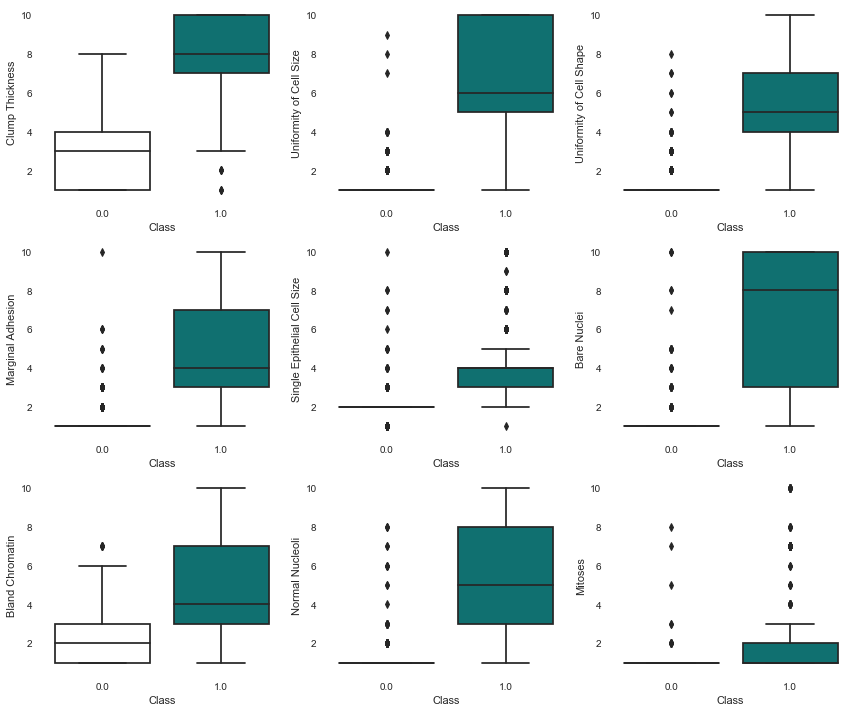

<IPython.core.display.Javascript object>

In [29]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(
    3, 3, figsize=(12, 10)
)

my_boxplot(df_bcw, df_bcw.columns[1], "Class", ax1)
my_boxplot(df_bcw, "Uniformity of Cell Size", "Class", ax2)
my_boxplot(df_bcw, df_bcw.columns[3], "Class", ax3)
my_boxplot(df_bcw, df_bcw.columns[4], "Class", ax4)
my_boxplot(df_bcw, df_bcw.columns[5], "Class", ax5)
my_boxplot(df_bcw, df_bcw.columns[6], "Class", ax6)
my_boxplot(df_bcw, df_bcw.columns[7], "Class", ax7)
my_boxplot(df_bcw, df_bcw.columns[8], "Class", ax8)
my_boxplot(df_bcw, df_bcw.columns[9], "Class", ax9)
plt.tight_layout()

**Visualization of the different classes show striking differences in how different metrics between the benign (class 0) and malignant (class 1) classes.**

The histogram below is a sanity check of the data.

Text(0.5, 1.0, 'Mitoses')

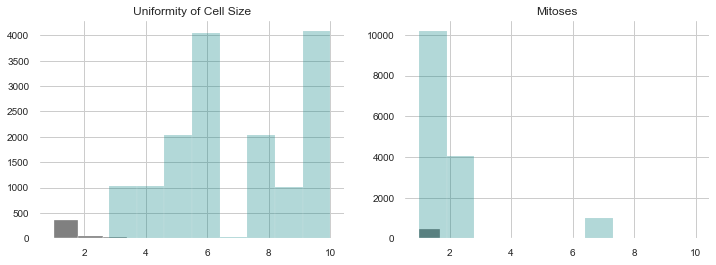

<IPython.core.display.Javascript object>

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df_bcw.loc[df_bcw["Class"] == 0, "Uniformity of Cell Size"].hist(ax=ax1, color="gray")
df_bcw.loc[df_bcw["Class"] == 1, "Uniformity of Cell Size"].hist(
    ax=ax1, color="teal", alpha=0.3
)
ax1.set_title("Uniformity of Cell Size")

df_bcw.loc[df_bcw["Class"] == 0, "Mitoses"].hist(ax=ax2, color="gray")
df_bcw.loc[df_bcw["Class"] == 1, "Mitoses"].hist(ax=ax2, color="teal", alpha=0.3)
ax2.set_title("Mitoses")

In [31]:
# def scatterplot

<IPython.core.display.Javascript object>

In [32]:
# def histogram

<IPython.core.display.Javascript object>

## Statistical Analysis

Running statistical tests will not tell us anything different than what visualization is telling us, but I will do it for completion.

One assumption of a t-test is that the samples are normally distributed and have roughly equal variances. It's clear from the visualizations that those assumptions aren't met. I'll do testing with Mann Whitney U, a non-parametric test.

#### Hypothesis Testing

In [33]:
def run_mannwhitneyu(df, metric_col, bin_col):
    class0 = sorted(df[bin_col].unique())[0]
    class1 = sorted(df[bin_col].unique())[1]
    x = df.loc[df[bin_col] == class0, metric_col]
    y = df.loc[df[bin_col] == class1, metric_col]
    mwu_statistic, mwu_pval = mannwhitneyu(x, y, use_continuity=True, alternative=None)
    return mwu_pval

<IPython.core.display.Javascript object>

In [34]:
for col in df_bcw.columns[1:10]:
    print(col, ", p-val (MWU): ", run_mannwhitneyu(df_bcw, col, "Class"))

Clump Thickness , p-val (MWU):  2.962499814887954e-248
Uniformity of Cell Size , p-val (MWU):  1.397122213828604e-287
Uniformity of Cell Shape , p-val (MWU):  5.6754325418640525e-275
Marginal Adhesion , p-val (MWU):  2.968780262477562e-216
Single Epithelial Cell Size , p-val (MWU):  5.72554960827236e-229
Bare Nuclei , p-val (MWU):  2.5399371744004968e-232
Bland Chromatin , p-val (MWU):  1.6343819328512755e-189
Normal Nucleoli , p-val (MWU):  1.838256125886033e-191
Mitoses , p-val (MWU):  4.920328373489133e-41


<IPython.core.display.Javascript object>

## Machine Learning

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

<IPython.core.display.Javascript object>

### Data preprocessing

In [36]:
def get_split_data(X, y, testsize):
    """
    Split data and also apply standard scaling
    """
    # Split data between train and test_and_holdout
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=testsize, random_state=19
    )

    from sklearn import preprocessing

    # Scale features based on training data
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scale = scaler.transform(X_train)

    # Apply transformation to test data
    X_test_scale = scaler.transform(X_test)

    return X_train_scale, X_test_scale, y_train, y_test, scaler

<IPython.core.display.Javascript object>

In [37]:
feature_col = df_bcw.columns[1:10]
target_col = "Class"

X_bcw = df_bcw[feature_col].copy()
y_bcw = df_bcw[target_col].copy()

<IPython.core.display.Javascript object>

In [38]:
# Apply 60:40 train test split
(
    X_train_bcw_scale,
    X_test_bcw_scale,
    y_bcw_train,
    y_bcw_test,
    scaler_bcw,
) = get_split_data(X_bcw, y_bcw, 0.4)

<IPython.core.display.Javascript object>

### Visualize groups with PCA (unsupervised learning)

In [39]:
from sklearn import decomposition

<IPython.core.display.Javascript object>

In [40]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_train_bcw_scale)

X_train_bcw_scale_pc = pca.transform(X_train_bcw_scale)

<IPython.core.display.Javascript object>

In [41]:
# Assemble df for plotting
df4pca = pd.DataFrame(X_train_bcw_scale_pc)
df4pca.columns = ["PC1", "PC2"]
df4pca["class"] = y_bcw_train.tolist()

<IPython.core.display.Javascript object>

In [42]:
df4pca.head()

PC1       PC2  class
0  3.146680 -1.448968    1.0
1  1.390887  2.953494    1.0
2 -1.801403  1.788396    1.0
3 -1.378395  0.016771    1.0
4  0.230457 -0.748050    1.0

<IPython.core.display.Javascript object>

Text(0, 0.5, 'PC2')

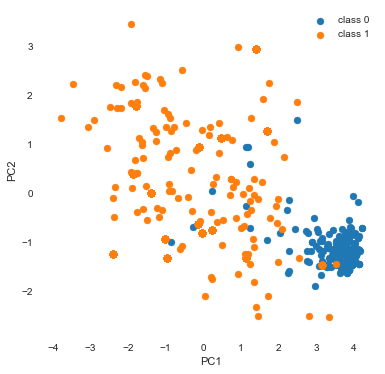

<IPython.core.display.Javascript object>

In [43]:
f, ax1 = plt.subplots(figsize=(6, 6))
for tissue_class in [0, 1]:
    df4pca_class = df4pca.loc[df4pca["class"] == tissue_class, :].copy()
    ax1.scatter(
        df4pca_class["PC1"], df4pca_class["PC2"], label="class " + str(tissue_class)
    )

ax1.legend()
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")

**This shows that the benign samples are pretty tightly clustered while the malignant classes show quite a bit of variability in the features.**

### Classification

In [44]:
def run_logreg_model(X_train_scale_set, y_train_set, X_test_scale_set, y_test_set):
    """
    Run a logistic regression model
    """

    log_reg = LogisticRegression(class_weight="balanced")
    log_reg.fit(X_train_scale_set, y_train_set)

    y_pred = log_reg.predict(X_test_scale_set)
    y_predprob = log_reg.predict_proba(X_test_scale_set)[:, 1]
    df_eval = pd.DataFrame({"test": y_test_set, "pred": y_pred, "predprob": y_predprob})

    return log_reg, df_eval

<IPython.core.display.Javascript object>

In [45]:
log_reg_bcw, df_eval_bcw = run_logreg_model(
    X_train_bcw_scale, y_bcw_train, X_test_bcw_scale, y_bcw_test
)

<IPython.core.display.Javascript object>

In [46]:
df_eval_bcw.head()

test  pred  predprob
Index                      
2747    1.0   1.0  0.999715
4352    1.0   1.0  0.999975
2675    1.0   1.0  0.999998
14933   1.0   1.0  0.989324
12144   1.0   1.0  0.999761

<IPython.core.display.Javascript object>

In [47]:
# Evaluation
print(metrics.classification_report(df_eval_bcw["test"], df_eval_bcw["pred"]))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       169
         1.0       1.00      1.00      1.00      6135

    accuracy                           1.00      6304
   macro avg       0.94      0.99      0.97      6304
weighted avg       1.00      1.00      1.00      6304



<IPython.core.display.Javascript object>

In [48]:
print(metrics.classification_report(df_eval_bcw["test"], df_eval_bcw["pred"]))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       169
         1.0       1.00      1.00      1.00      6135

    accuracy                           1.00      6304
   macro avg       0.94      0.99      0.97      6304
weighted avg       1.00      1.00      1.00      6304



<IPython.core.display.Javascript object>

**Overall the model predicts reasonably well. The main priority would be catching the malignant cases and it does well in both precision and recall. The main metric I was evaluating was the F1 score since this is a case of rare classes (in the case of the benign case).**

### Feature importance 

#### Evaluation of importance by coefficient values

In [49]:
df_bcw_feature_coefficients = pd.DataFrame()
df_bcw_feature_coefficients["features"] = df_bcw.columns[1:10]
df_bcw_feature_coefficients["coef_values"] = pd.Series(log_reg_bcw.coef_[0])
df_bcw_feature_coefficients["abs_coef_values"] = np.abs(
    df_bcw_feature_coefficients["coef_values"]
)
df_bcw_feature_coefficients.sort_values(by="abs_coef_values", ascending=False)

features  coef_values  abs_coef_values
1      Uniformity of Cell Size     4.350169         4.350169
3            Marginal Adhesion     3.841886         3.841886
0              Clump Thickness     2.793351         2.793351
7              Normal Nucleoli    -2.693947         2.693947
8                      Mitoses     1.563695         1.563695
5                  Bare Nuclei     1.472566         1.472566
2     Uniformity of Cell Shape     1.146645         1.146645
6              Bland Chromatin     0.732651         0.732651
4  Single Epithelial Cell Size    -0.196463         0.196463

<IPython.core.display.Javascript object>

#### Evaluation by recursive feature elimination (RFE)

In [56]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

<IPython.core.display.Javascript object>

In [51]:
predictors = X_train_bcw_scale
selector = RFE(log_reg_bcw, n_features_to_select=1)
selector = selector.fit(predictors, y_bcw_train)

<IPython.core.display.Javascript object>

In [52]:
order = selector.ranking_
order

array([1, 3, 6, 2, 9, 5, 8, 4, 7])

<IPython.core.display.Javascript object>

In [53]:
df_bcw_feature_by_rfe = pd.DataFrame()
df_bcw_feature_by_rfe["features"] = df_bcw.columns[1:10]
df_bcw_feature_by_rfe["order_by_rfe"] = order
df_bcw_feature_by_rfe.sort_values(by="order_by_rfe")

features  order_by_rfe
0              Clump Thickness             1
3            Marginal Adhesion             2
1      Uniformity of Cell Size             3
7              Normal Nucleoli             4
5                  Bare Nuclei             5
2     Uniformity of Cell Shape             6
8                      Mitoses             7
6              Bland Chromatin             8
4  Single Epithelial Cell Size             9

<IPython.core.display.Javascript object>

In [57]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

selector_cv = RFECV(log_reg_bcw, step=1, cv=5)

<IPython.core.display.Javascript object>

In [59]:
selector_cv.fit(predictors, y_bcw_train)

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

<IPython.core.display.Javascript object>

In [60]:
selector_cv.support_

array([ True,  True,  True,  True, False,  True, False,  True, False])

<IPython.core.display.Javascript object>

In [61]:
selector_cv.ranking_

array([1, 1, 1, 1, 4, 1, 3, 1, 2])

<IPython.core.display.Javascript object>

**It's clear from these two feature selection methods that the top 3 features are Clump Thickness, Marginal Adhesion, and Uniformity of Cell Size. If we were to go back and choose the top 3, we can see how well the model performs.**

In [54]:
predictors = X_train_bcw_scale
selector = RFE(log_reg_bcw, n_features_to_select=3)
selector = selector.fit(predictors, y_bcw_train)

y_bcw_pred_rfe = selector.predict(X_test_bcw_scale)

<IPython.core.display.Javascript object>

In [55]:
print(metrics.classification_report(df_eval_bcw["test"], y_bcw_pred_rfe))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       169
         1.0       1.00      1.00      1.00      6135

    accuracy                           1.00      6304
   macro avg       0.96      0.99      0.98      6304
weighted avg       1.00      1.00      1.00      6304



<IPython.core.display.Javascript object>

**The model actually improved slightly with the reduced number of features.**


# Summary

Next steps: While the model performed reasonably well, it's possible that improvements to the precision and recall can be made for the benign class. Perhaps other classification models, such as random forest might provide improvements. 

Other next steps could be with how I dealt with anomalous data. For example, with samples that contained missing values and non-numeric entries, I observed that the overall incidence of these samples was relatively low (67 relative to the ~16,000 in total). I believed it was okay to remove these samples, but it's possible that the class skewness could be affected by these samples and it might be worth investigating (e.g. with the data collector) if data can be obtained. Another assumption I made were with entries that appeared to be an order of magnitude higher in the feature and the target. I made the decision to assume this was an error and corrected by reducing these numbers 10-fold. It would help to confirm if that was a reasonable assumption.

Actionable insights: This dataset points to features of the tissue that could be the biggest drivers of malignancy, namely, clump thickness, marginal adhesion, and uniformity of cell size. Furthermore, these three features had equivalent or slightly better prediction performance than when using all nine original features. From the clinician's perspective, it would make sense to focus on these for data collection, making data collection both efficient and effective.